In [1]:
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%gui qt
import utoolbox.util.files as fileutils

#### Plot parameters

Y range.

In [2]:
y_ticks = [-1., 0., 1.]

Column of interest.

In [3]:
col_names = ['rel_distance']

In [4]:
titles = ['Relative Distance']

#### Preset figure visual

In [5]:
params = {
    'font': {
        'size': 32
    },
    'text': {
        'color': 'w'
    },
    'axes': {
        'facecolor': 'k',
        'edgecolor': 'w',
        'labelcolor': 'w'
    },
    'xtick': {
        'color': 'w'
    },
    'ytick': {
        'color': 'w'
    },
    'figure': {
        'facecolor': 'k',
        'figsize': (10, 10)
    },
    'savefig': {
        'facecolor': 'k',
        'edgecolor': 'k'
    }
}

In [6]:
for key, value in params.items():
    mpl.rc(key, **value)

#### Load file

In [7]:
source_file = fileutils.get_open_file()

In [8]:
source_file

'/Users/Andy/Desktop/utoolbox/data/06142017_U2Os_Demo_model/summary_514_membrane.csv'

In [9]:
data = pd.read_csv(source_file, index_col=[0, 1])

#### Generate plot workspace

In [10]:
# extract data from table, secondary index
n_bins = len(data.index.levels[1])

In [11]:
# generate required grids
bins = np.linspace(-np.pi, np.pi, n_bins+1, dtype=np.float)
grids = np.linspace(-np.pi, np.pi, n_bins, endpoint=False)

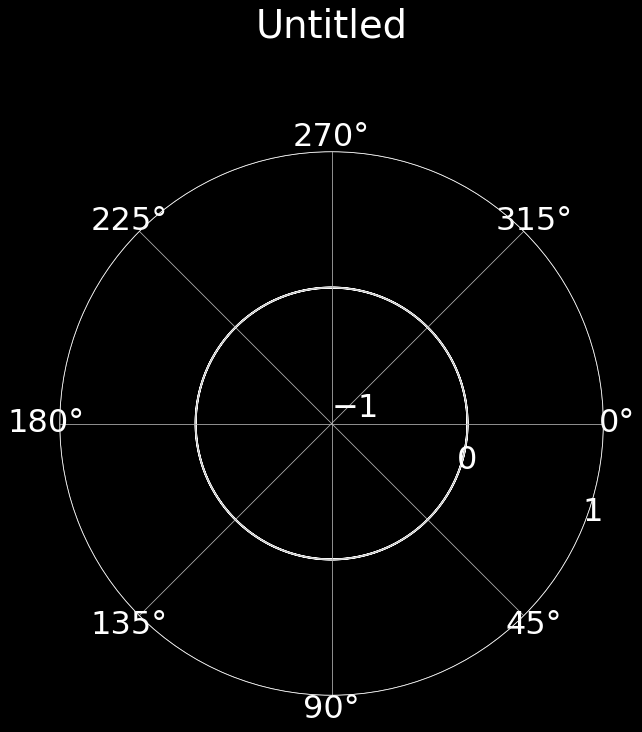

In [18]:
f = plt.figure()

ax = f.add_subplot(1, 1, 1, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('E')

ax.set_title("", y=1.2)
bar = ax.bar(
    grids, np.zeros_like(grids),
    width=2*np.pi/n_bins, 
    color=(1., 1., 1., .25), # white with 25% transparency
    edgecolor='w',
    fill=True,
    linewidth=2
)
ax.set_yticks(y_ticks)

#### Convert to 2D array

In [13]:
root_dir = os.path.dirname(source_file)

In [19]:
# number of timepoints
n_tp = len(data.index.levels[0])

for col_name, title in zip(col_names, titles):
    output_dir = os.path.join(root_dir, col_name)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for i_tp in range(n_tp):
        ax.set_title(title, y=1.2)
        
        # assign bar heights
        for obj, height in zip(bar, data.loc[i_tp, :][col_name]):
            obj.set_height(height)
        # force update immediately, workaround
        f.canvas.draw()
        
        f.savefig(os.path.join(output_dir, "t_{:03d}.tif".format(i_tp)))